In [3]:
import sys
sys.path.append('../bin/')
from load_data import *
from estimate_covariance import *
from make_figures import *
from classify import *
from utils import *
import matplotlib.pyplot as plt
import time

In [4]:
input_data = 'mnist'
num_classes= 10
DATA_SHAPE = 28*28
num_comp   = [50,200,500,DATA_SHAPE]
outpath    = '../outputs/%s/classification/'%input_data
covpath    = '../outputs/%s/covariance_estimator/'%input_data
plotpath   = '../outputs/%s/figures/'%input_data
modes      = ['ML']
masks      = [True,False]

In [5]:
if input_data == 'mnist':
    load_data = load_mnist
if input_data == 'cifar10':
    load_data = load_cifar10

In [6]:
x_train, targets_train, x_test, targets_test = load_data()

In [7]:
d_v, mv_in, mv_out = prepare_data(data=x_train,labels=targets_train, num_classes=num_classes)
d_t, mt_in, mt_out = prepare_data(data=x_test,labels=targets_test, num_classes=num_classes)

In [8]:
estimate_covariances(d_v,mv_in,mv_out,modes,masks,covpath)

True

In [9]:
res = perform_classification(modes,masks, inpath=covpath, outpath=outpath, pca=True, rerun=False)

../outputs/mnist/figures/MLvsPCA_masked.png


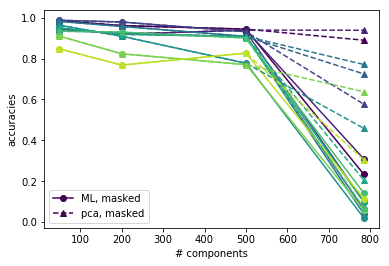

In [10]:
_=make_acc_figure(['ML','pca'],['masked'],res,num_classes,num_comp,plotpath,'MLvsPCA_masked.png')